- Student 1 Name: SHASHWAT SINGH
- Student 2 Name: SAMERAN BANERJEE

change the name of this notebook to  `name_1_name_2_notebook_??.ipynb` with *no spaces, no accents and no strange characters!* and where `??` stands for the number of the notebook you are working on.

# PPM Numerical Methods -- Numerical Methods for Physics

# Numerical methods: basics and linear regression

# Numbers, approximations and errors

Import the needed packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Write a program that determines the underflow and overflow limits

In [4]:
a = 1.#input()
for _ in range(300):
    a = a*10
    if np.isinf(a):
        break
print(a*100000000)

1.0000000000000002e+308


### Write a program to determine the machine precision (within a factor of two)

In [5]:
b = 1.0
c = 0
while (1.0+b) > 1.0:
    c = b
    b = b/1.1
print(c)

1.158287085355336e-16


### Explore subtractive cancellation

Consider the fucntions:
$$f(x)=\frac{1-\sqrt{1-t(x)^2}}{t(x)}$$  where $$t(x)=e^{-\pi x}$$

- plot the function $f(x)$ for $x$ in the range $[5,7]$

Rewrite the function $f(x)$ as

$$ \frac{t(x)}{1+\sqrt{1-t(x)^2}} $$

- plot on the same graph the two functions and comment

- label the axes

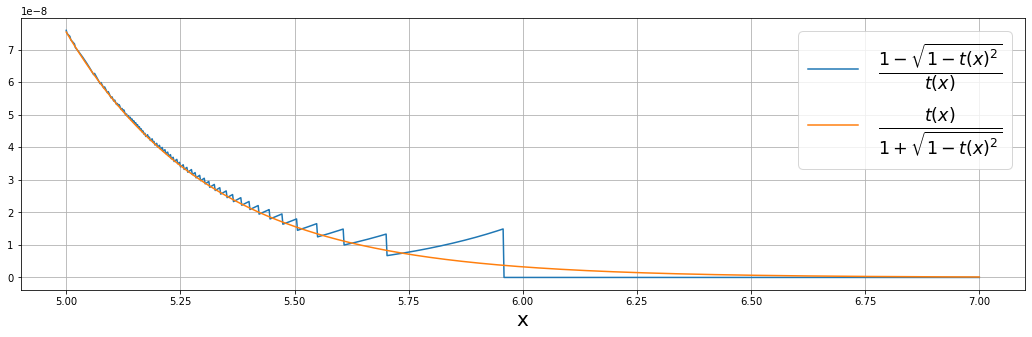

In [6]:
def func1(x):
    t = np.exp(-np.pi*x)
    f = (1 - np.sqrt(1-t**2))/t
    return f

def func2(x):
    t = np.exp(-np.pi*x)
    f = t/(1 + np.sqrt(1-t**2))
    return f

if __name__ == "__main__":
    x = np.linspace(5,7,1000)
    plt.figure(figsize=(18,5))
    plt.plot(x,func1(x),label='$\\frac{1-\sqrt{1-t(x)^2}}{t(x)}$')
    plt.plot(x,func2(x),label='$\\frac{t(x)}{1+\sqrt{1-t(x)^2}}$')
    plt.xlabel("x", fontsize=20)
    plt.legend(fontsize=25)
    plt.grid()
    plt.show()

# Linear regression

### Linear regression on simple data sets

- Write a function that given the input data returns the fitting parameters $a_1$ and $a_2$. The function template is:

```python
def lin_reg(x_data, y_data):
    """Function documentation"""
    

    return (a0, a1)
```

- Test your function on a simple set of data: plot the data and the fitted function

In [10]:
def lin_reg(x_data, y_data):
    
    x_ = np.average(x_data)
    y_ = np.average(y_data)
    s1 = np.sum(x_data*y_data) - len(x_data)*x_*y_
    s2 = np.sum(x_data**2) - len(x_data)*x_**2

    a1 = s1/s2
    a0 = y_ - a1*x_
    
    return (a0, a1)

### Linear regression on solar wind data

We are now going to perform a linear regression fitting on measurements of the solar wind from the spacecraft [ULYSSE](https://en.wikipedia.org/wiki/Ulysses_(spacecraft)).

- The solar wind data is in the file `ulysse.txt` in the `data/` folder. The data file contains thre columns
    1. First column: the heliocentric distance in AU (astronomical units), $r$
    2. Second column: the solar wind density in m$^{-3}$, $n(r)$
    3. Third column: the temperature in Kelvin, $T(r)$
    
- load and plot the data (always label your plots and put the units!!)

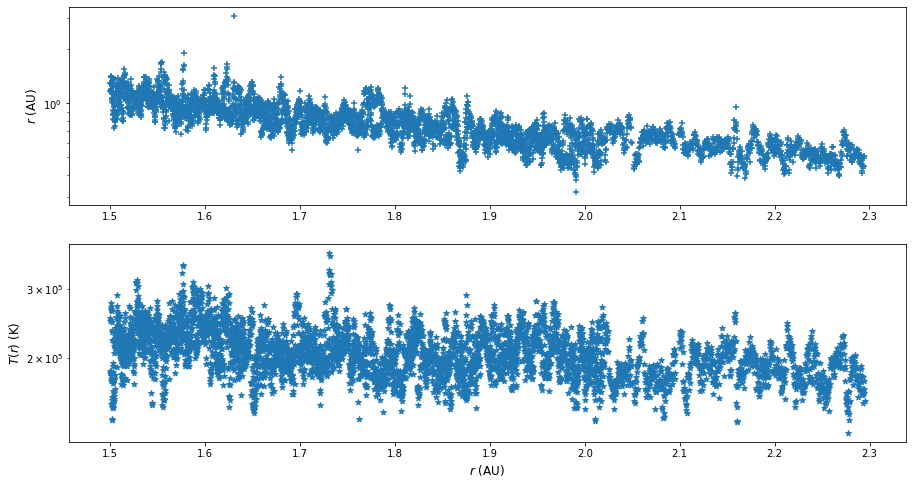

In [8]:
data = np.loadtxt('F:/PPM/M1 - 1/Numerical Methods/L2/notebooks/data/ulysse.txt')
r, n, T = data[:,0], data[:,1], data[:,2]

fig, ax = plt.subplots(2, figsize=(15,8))
ax[0].scatter(r, n, marker='+')
ax[0].set_ylabel('$r$ (AU)', fontsize=12)
ax[0].set_yscale('log')
ax[1].scatter(r, T, marker='*')
ax[1].set_ylabel('$T(r)$ (K)', fontsize=12)
ax[1].set_yscale('log')
plt.xlabel('$r$ (AU)', fontsize=12)
plt.show()

The solar wind is "well" approximated as steady-state, spherically symmetric expanding plasma sphere. The expected density as a function of heliocentric distance is: $$n(r) = \alpha r^{-2}$$
 - From conservation of mass and momentum, can you show why it is so?
 - Fit the satellite data...be careful, you want to do a linear regression on a power law data.
 - Plot the data and your fit.
     - Would you conclude that the solar wind density distribution is as "expected"?

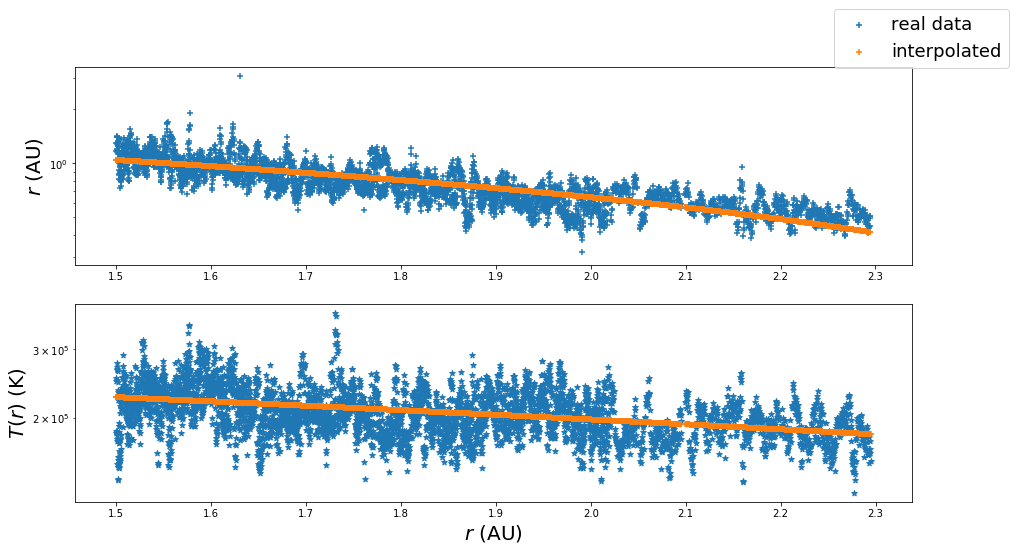

In [9]:
def interpolate(x, y):
    x_ = np.average(x)
    y_ = np.average(y)
    s1 = np.sum(x*y) - len(x)*x_*y_
    s2 = np.sum(x**2) - len(x)*x_**2

    a1 = s1/s2
    a0 = y_ - a1*x_
    
    return a0+a1*x

if __name__ == "__main__":

    n_interpolated = interpolate(r, n)
    T_interpolated = interpolate(r, T)

    fig, ax = plt.subplots(2, figsize=(15,8))
    ax[0].scatter(r, n, marker='+', label='real data')
    ax[0].scatter(r, n_interpolated, marker='+', label='interpolated')
    ax[0].set_ylabel('$r$ (AU)', fontsize=20)
    ax[0].set_yscale('log')
    ax[1].scatter(r, T, marker='*')
    ax[1].scatter(r, T_interpolated, marker='+')
    ax[1].set_ylabel('$T(r)$ (K)', fontsize=20)
    ax[1].set_yscale('log')
    fig.legend(fontsize=18)
    plt.xlabel('$r$ (AU)', fontsize=20)
    plt.show()

Assuming the solar wind to behave as a perfect gas ($\gamma = 5/3$), the pressure is then given by: $$P(r) = k_{B} n(r) T(r)$$

 - By fitting the pressure data as function of distance, show that the solar wind expansion is neither adiabatic nor isothermal

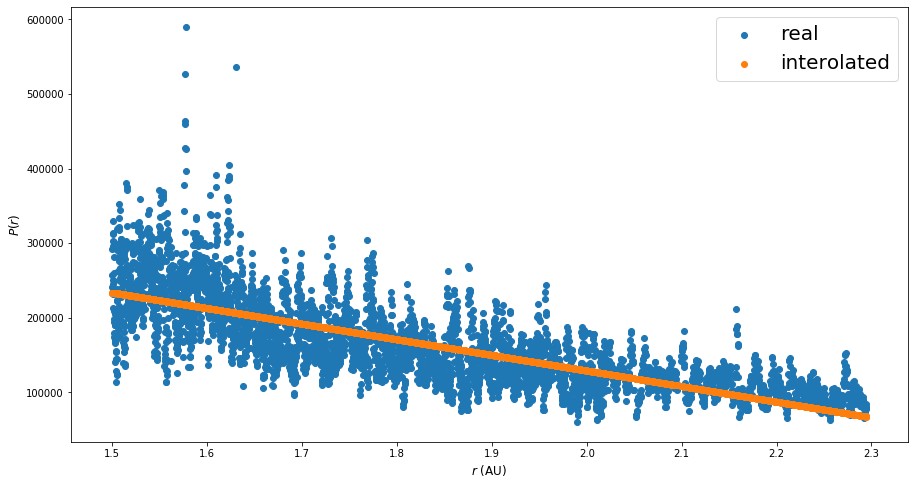

In [18]:
def interpolate(x, y):
    x_ = np.average(x)
    y_ = np.average(y)
    s1 = np.sum(x*y) - len(x)*x_*y_
    s2 = np.sum(x**2) - len(x)*x_**2

    a1 = s1/s2
    a0 = y_ - a1*x_
    
    return a0+a1*x

P = interpolate(r, n*T)
plt.figure(figsize=(15,8))
plt.scatter(r, n*T, label='real')
plt.scatter(r, P, label='interolated')
plt.legend(fontsize=20)
plt.xlabel('$r$ (AU)', fontsize=12)
plt.ylabel('$P(r)$', fontsize=12)
plt.show()

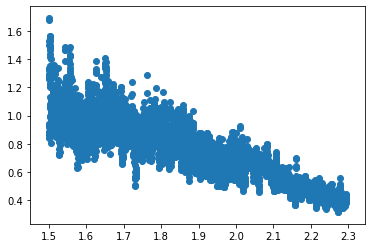

In [23]:
plt.scatter(r, P/T)